In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D , MaxPooling2D
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image


In [6]:
train = pd.read_csv('train.csv')

3752

In [7]:
index = 0
train_image = []
for i in tqdm(range(train.shape[0])):
    try:
        img = image.load_img('train/'+train['id'][i].astype('str')+'.png', target_size=(28, 28, 1), color_mode='grayscale')
        img = image.img_to_array(img)
        img = img / 255
        train_image.append(img)
        index = index + 1
    except FileNotFoundError:
        train.drop(index , inplace=True)
        continue

X = np.array(train_image)


100%|████████████████████████████████████████████████████████████████████████████████████████| 60000/60000 [07:52<00:00, 126.97it/s]


In [8]:
y = train['label'].values
y = to_categorical(y)

(59998, 28, 28, 1)

In [9]:
x_train , x_val , train_out , val_out = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [10]:
model = Sequential()
model.add(Conv2D(32 , kernel_size=(3,3) , input_shape = (28,28,1) , activation = 'relu'))
model.add(Conv2D(32 , kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())          
model.add(Dense(128 , activation = 'relu'))          
model.add(Dropout(0.5))
model.add(Dense(10 , activation = 'softmax'))                

C:\Users\DC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.compile(loss='categorical_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'] )

In [12]:
model.fit(x_train , train_out , epochs=10 , validation_data=(x_val , val_out))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.7564 - loss: 0.6931 - val_accuracy: 0.8791 - val_loss: 0.3271
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8717 - loss: 0.3523 - val_accuracy: 0.8991 - val_loss: 0.2825
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8922 - loss: 0.2961 - val_accuracy: 0.9078 - val_loss: 0.2526
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9037 - loss: 0.2626 - val_accuracy: 0.9090 - val_loss: 0.2532
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9104 - loss: 0.2368 - val_accuracy: 0.9147 - val_loss: 0.2332
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9167 - loss: 0.2215 - val_accuracy: 0.9174 - val_loss: 0.2234
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9237 - loss: 0.2052 - val_accuracy: 0.9169 - val_loss: 0.2389
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9251 -

In [13]:
import tensorflow as tf

checkpoint = tf.train.Checkpoint(model=model)
checkpoint.save('model')

'model-1'

In [14]:
test = pd.read_csv('test.csv')

In [15]:
test

,id
0,60001
1,60002
2,60003
3,60004
4,60005
...,...
9995,69996
9996,69997
9997,69998
9998,69999


In [16]:
dic = {0:'t-shirt',1:'pant',2:'full-sleeve t-shirt',3:'frock',4:'black-jacket',5:'stiletto heel',6:'white-jacket',7:'sneakers',8:'hand-bag',9:'chelsea-boot'}

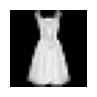

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
frock


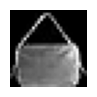

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
hand-bag


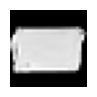

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
hand-bag


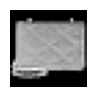

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
hand-bag


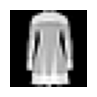

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
frock


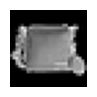

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
hand-bag


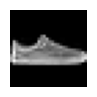

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
stiletto heel


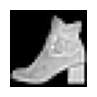

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
chelsea-boot


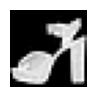

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
stiletto heel


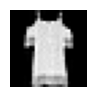

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
frock


In [17]:
import random
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

for i in range(10):
    index = random.randint(0,10000)
    img1 = image.load_img('test/' + test['id'][index].astype('str') + '.png', target_size=(28, 28, 1), color_mode='grayscale')
    img2 = image.img_to_array(img1)
    img3 = img2 / 255
    plt.figure(figsize = (1,1))
    plt.imshow(img3.reshape(28, 28), cmap='gray')  # Display the normalized image
    plt.axis('off')
    plt.show()
    predicted_val = model.predict(np.expand_dims(img3, axis=0))
    max_index = np.argmax(predicted_val)
    print(dic[max_index])
